<a href="https://colab.research.google.com/github/veerkamdar007/Tensorflow_Hands-On/blob/main/01_NN_Regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression with NN in TF

In [ ]:
#!pip install keras
#!pip install matplotlib

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.15.0


# Create some data to view and fit

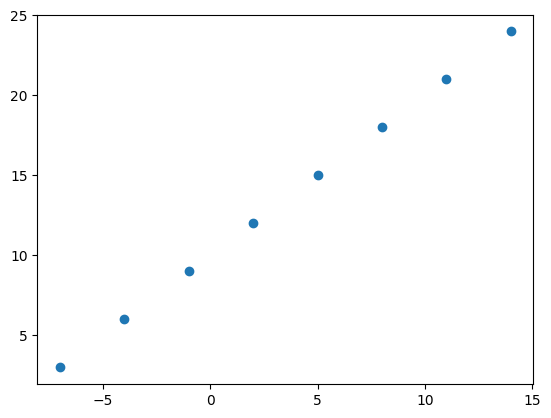

In [ ]:
# Create features
X = np.expand_dims(np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0]),axis=1)

# Create Labels
y = np.expand_dims(np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0]),axis=1)

# Visualise it
plt.scatter(X,y);

In [ ]:
 y = X + 10 # want our NN to learn this equation

# Input and Output shapes

In [ ]:
# Create a demo for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8, 1), (8, 1))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape # shape = NULL, because ndim = 0

((1,), (1,))

In [ ]:
X[0].ndim

1

In [ ]:
# Turn our numpy arrays into tensors

X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.],
        [24.]], dtype=float32)>)

In [ ]:
#tf.experimental.numpy.experimental_enable_numpy_behavior()

## Steps in modelling with TensorFlow (Very imp.)

1. **Creating a model** - Define the input and the output layers , as well as the hidden layers of a Deep Leanring model.

2. **Compiling a model** - Define the loss function(in other words,tells our model how wrong it is) and the optimizer(tells our model to improe the patters its learning) and evalutaion metrics(what we can use to interpret the performance of the model).

3. **Fitting a model** - letting the model try to find the patterns between X and y (Features and labels resp.)

In [ ]:
tf.random.set_seed(42)

#Create a model using the Sequential API:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 521ms/step - loss: 17.9990 - mae: 17.9990
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 17.7177 - mae: 17.7177
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 17.4365 - mae: 17.4365
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 17.1552 - mae: 17.1552
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 16.8740 - mae: 16.8740


In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 103ms/step


array([[-12.4967375]], dtype=float32)

In [ ]:
y_pred + 11

array([[-1.4967375]], dtype=float32)

# Improving our model

We can improve our model by altering the shapes we took to create our model

1. **Creating a model** - Here we might add more layers,increase the number of layers,change the activation function in each layer.

2. **Compiling a model** - Here we might change the optimizaion function perhaps the LR of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data(Give the model more examples to learn from)

In [ ]:
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = None),
    tf.keras.layers.Dense(50,activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])

# Fit the model
model.fit(X,y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 971ms/step - loss: 12.7979 - mae: 12.7979
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.4901 - mae: 12.4901
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1818 - mae: 12.1818
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8850 - mae: 11.8850
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 11.5931 - mae: 11.5931
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3145 - mae: 11.3145
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0593 - mae: 11.0593
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8467 - mae: 10.8467
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6348 - mae: 10.6348
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.4211 - mae: 10.4211
Epoch 11/100
1/1 [==============================]

In [ ]:
model.predict([17.0]) # maybe our model is ust overfitting

1/1 [==============================] - 0s 125ms/step


array([[31.927881]], dtype=float32)

# Evaluating a model
In practice , the workflow looks like below:

Build a model  -> fit it -> evaluate it -> tweak the model -> fit it -> evaluate it -> tweak a model and so on...

# When evaluating the model:

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?

* The model itself - what does our model look like?

* The training of a model - how does a model perform while it learns

* The predictions of the model - How do the predictions of a model line up against the ground truth(the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the data set
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

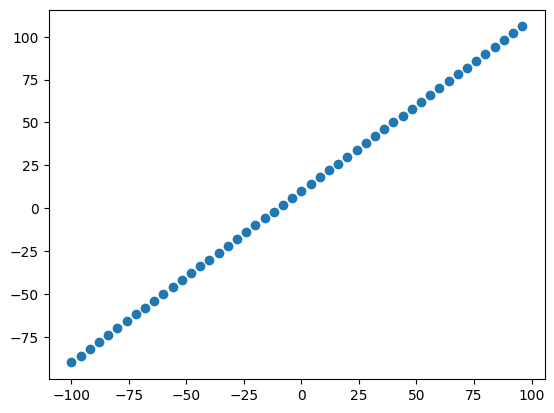

In [ ]:
plt.scatter(X,y)

### The 3 sets...

* **Training Set** - The model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation Set** - The model gets tuned on this data,which is typically 10-15% of the data available

* **Test Set** - The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.


In [ ]:
 len(X)

50

In [ ]:
X_train = np.expand_dims(X[:40],axis=1)# first 40 are training samples
y_train = np.expand_dims(y[:40],axis=1)

X_test = np.expand_dims(X[40:],axis=1) # last 10 are testing examples
y_test = np.expand_dims(y[40:],axis=1)

len(X_train),len(X_test)

(40, 10)

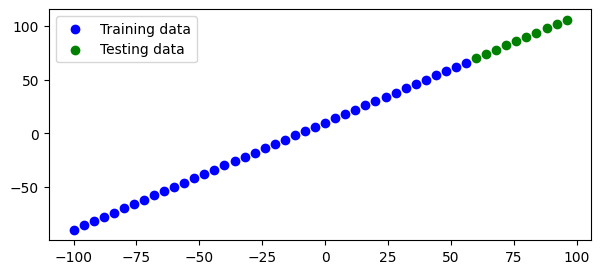

In [ ]:
# Visualizing the data
plt.figure(figsize=(7 ,3))

plt.scatter(X_train,y_train,c="b",label="Training data")
plt.scatter(X_test,y_test,c='g',label = "Testing data")

plt.legend();

In [ ]:
# Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#model.fit(X_train,y_train,epochs=100)

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
X[0],y[0] # input is just a number we are passing in.

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
#Let's create a model which builds automatically by  dfining the input shape aregument in the first layer
tf.random.set_seed(42)

# Create a model(same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(6,input_shape = [1],name='input_layer'),
    tf.keras.layers.Dense(1,name="output_layer")

])

#2. Compile

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 6)                 12        
                                                                 
 output_layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total_params - Total number of parameters in the model

* Trainable_params - These are the params the model can update as it trains.

* Non-trainable_params - These params aren't updated during training(This is typical when you bring in already learnt patterns or parameters from other models during **Transfer Learning**).

In [ ]:
# Let's fit
model.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 6)                 12        
                                                                 
 output_layer (Dense)        (None, 1)                 7         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


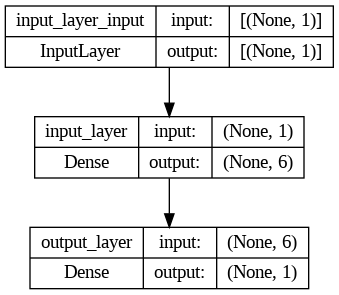

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model,show_shapes=True)

### To visualize our model's predictions

To visualize the predictions,it's a good idea to plot them against the ground truth labels.

Often we will see this in the form `y_test` or `y_true` versus `y_pred`(ground truth VS model's predictions)



In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[ 78.315994],
       [ 83.418846],
       [ 88.5217  ],
       [ 93.624565],
       [ 98.72741 ],
       [103.83027 ],
       [108.93312 ],
       [114.03597 ],
       [119.138824],
       [124.24167 ]], dtype=float32)

In [ ]:
y_test

array([[ 70],
       [ 74],
       [ 78],
       [ 82],
       [ 86],
       [ 90],
       [ 94],
       [ 98],
       [102],
       [106]], dtype=int32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                      train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):

  """
  Plots training data,test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",label='Training data')
  plt.scatter(test_data,test_labels,c="g",label="Testing data")

  plt.scatter(test_data,predictions,c="r",label="Predictons")
  plt.legend();


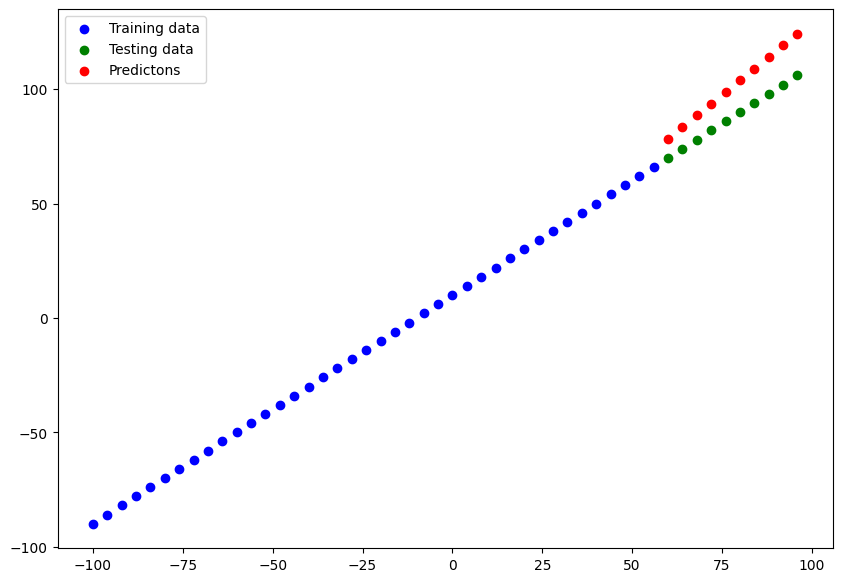

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

There would be different eval techniques depending on the problem we are working on.

Since we're working on a regression,two of the main metrics are:

* MAE - Mean absolute error
* MSE - Mean squared error
* Huber Loss

In [ ]:
X_test,y_test

(array([[60],
        [64],
        [68],
        [72],
        [76],
        [80],
        [84],
        [88],
        [92],
        [96]], dtype=int32),
 array([[ 70],
        [ 74],
        [ 78],
        [ 82],
        [ 86],
        [ 90],
        [ 94],
        [ 98],
        [102],
        [106]], dtype=int32))

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 225ms/step - loss: 13.2788 - mae: 13.2788


[13.278836250305176, 13.278836250305176]

In [ ]:
mae= tf.keras.losses.MAE(y_true=y_test,y_pred=tf.constant(y_pred))
mae

# Get rid of the 'ones' in the y_test and y_pred shapes for this function to return a single value

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 8.315994,  9.418846, 10.521698, 11.624565, 12.727409, 13.830269,
       14.933121, 16.035973, 17.138824, 18.241669], dtype=float32)>

In [ ]:
y_pred.shape,y_test.shape # In order to get the same value as our evaluation metric we actually remove the dimension 1 from our shape using squeeze method

((10, 1), (10, 1))

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_test),
                                     y_pred = tf.squeeze(y_pred))
mae

# This is a great starter metric for any regression problem.

<tf.Tensor: shape=(), dtype=float32, numpy=13.278836>

In [ ]:
# Mean Squared error
mse = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test),
                                    y_pred = tf.squeeze(y_pred))
mse

# When larger errors are more significant than smaller errors we use MSE

<tf.Tensor: shape=(), dtype=float32, numpy=186.36186>

In [ ]:
# Huber loss
huber = tf.keras.losses.Huber()
huber = tf.reduce_mean(huber((y_test),(y_pred)))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=12.778837>

### Running experiments to improve our model performace

In [ ]:
X_train.T,y_train.T

(array([[-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
          -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
          -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
           32,   36,   40,   44,   48,   52,   56]], dtype=int32),
 array([[-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
         -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
          14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
          66]], dtype=int32))

In [ ]:
# model 1
tf.random.set_seed(42)

model1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

model1.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 88ms/step


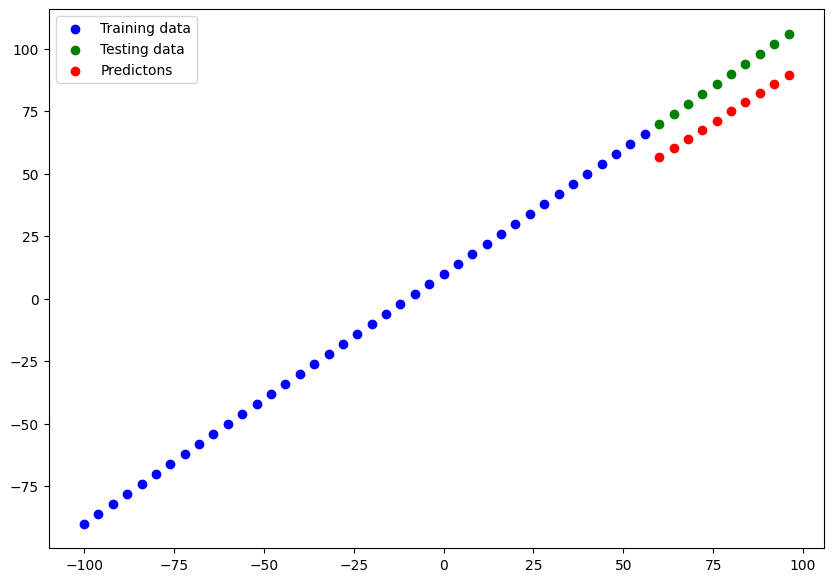

In [ ]:
# Make and plot predictions for model_1

y_preds_1 = model1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
# Calculate model_1 evalutaion metrics
mae_1 = tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_test),
                                     y_pred = tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mean_squared_error(y_true = tf.squeeze(y_test),
                                      y_pred = tf.squeeze(y_preds_1))

In [ ]:
mae_1,mse_1 # Our predictions are off by 30 values

(<tf.Tensor: shape=(), dtype=float32, numpy=14.890386>,
 <tf.Tensor: shape=(), dtype=float32, numpy=222.556>)

In [ ]:
# Model 2:

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(7),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics = ["mae"])

model2.fit(X_train,y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 54ms/step


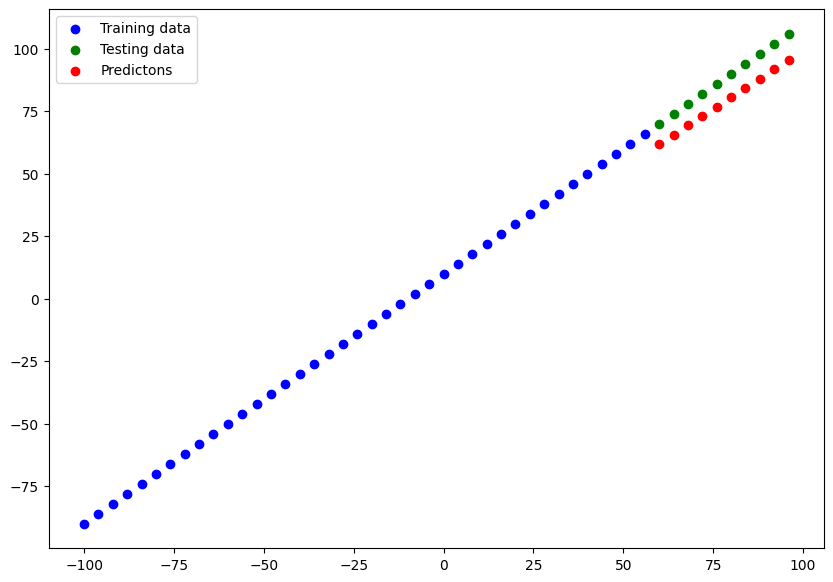

In [ ]:
y_preds_2 = model2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Calculate model_1 evalutaion metrics
mae_2 = tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_test),
                                     y_pred = tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mean_squared_error(y_true = tf.squeeze(y_test),
                                      y_pred = tf.squeeze(y_preds_2))

In [ ]:
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=9.291971>,
 <tf.Tensor: shape=(), dtype=float32, numpy=86.84062>)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(X_train,y_train,verbose=0)

1/1 [==============================] - 0s 47ms/step


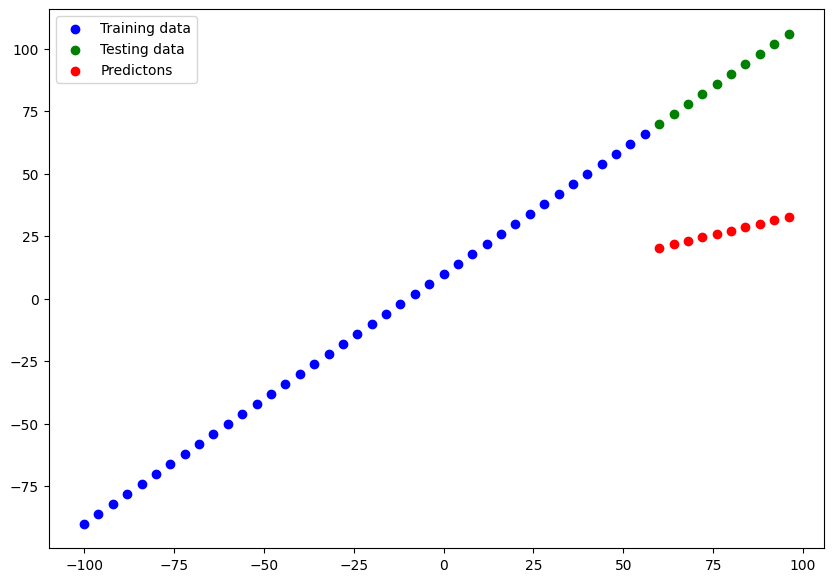

In [ ]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [ ]:
# Calculate model_3 evalutaion metrics
mae_3 = tf.metrics.mean_absolute_error(y_true = tf.squeeze(y_test),
                                     y_pred = tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mean_squared_error(y_true = tf.squeeze(y_test),
                                      y_pred = tf.squeeze(y_preds_3))

In [ ]:
mae_3,mse_3  # Substantially higher than other models

(<tf.Tensor: shape=(), dtype=float32, numpy=61.424355>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3830.3696>)

### Compating the results of our experiments

* We have run a few experiments,let's compare the results.

In [ ]:
# Let's compare our model's results using a Pandas DataFrame

import pandas as pd

model_results = [["model1" ,mae_1.numpy(),mse_1.numpy()],
                 ["model2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model1,14.890386,222.556000
1,model2,9.291971,86.840622
2,model_3,61.424355,3830.369629


In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking your experiments

* One really good habit in ML modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments. And hence there are tools available for the same.

**Resource** : As you build more models,you'll want to look into using:

* Tensorboard - A component of the TF lib to help track modelling experiments

* Weights and Biases - A tool for tracking all kinds of ML experiments(plugs straight into Tensorboard)

### Saving our models

* There are 2 main formats to save our model:
  1. The SavedModel format
  2. THe HDF5 format (Hierarchical Data Format)
  

In [ ]:
# Save using the SavedModel format
model1.save("Best_Model_Trained")

In [ ]:
# Save using HDF fromat:
model1.save("Best_Model_Trained.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [ ]:
# Load in the savedmodel format model

loaded_SavedModel_format = tf.keras.models.load_model("/content/Best_Model_Trained")
loaded_SavedModel_format.summary() # Same as the summary of model1 --> Hence it is correct.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model1 predictions with SavedModel formal model predictions

model_1_preds = model1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_1_preds,loaded_SavedModel_format_preds

(array([[56.539032],
        [60.221382],
        [63.903732],
        [67.58608 ],
        [71.26844 ],
        [74.95079 ],
        [78.63314 ],
        [82.3155  ],
        [85.99785 ],
        [89.6802  ]], dtype=float32),
 array([[56.539032],
        [60.221382],
        [63.903732],
        [67.58608 ],
        [71.26844 ],
        [74.95079 ],
        [78.63314 ],
        [82.3155  ],
        [85.99785 ],
        [89.6802  ]], dtype=float32))

In [ ]:
#Loading in a model using the .h5 formal

loaded_h5_model = tf.keras.models.load_model("/content/Best_Model_Trained.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1_preds = model1.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_1_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 48ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Download a model(or any other file) from Google colab

In [ ]:
# Download a file from Google Colab

from google.colab import files
files.download("/content/Best_Model_Trained.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive(reuires mounting Goolge Drive)

!cp /content/Best_Model_Trained.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

'02-11-22, 1054 PM Microsoft Lens.pdf'
'04-09-22, 1147 PM Microsoft Lens.pdf'
'14-10-22, 454 PM Microsoft Lens.pdf'
 1504.02462.pdf
'16614 train schedule.pdf'
 1-BankNifty.pdf
 20160820_210421.jpg
 20160820_210434.jpg
 20160820_210435.jpg
 20160820_210443.jpg
 20160820_210445.jpg
 20160820_211250.jpg
 20160820_211310.jpg
 20160820_211451.jpg
 20160820_211456.jpg
 20160820_211547.jpg
 20160820_211628.jpg
 20160820_211631.jpg
 20160820_211653.jpg
 20160820_211738.jpg
 20160820_211800.jpg
 20160820_212222.jpg
 20160820_212245.jpg
 20160820_212246.jpg
 20160820_212251.jpg
 20160820_212253.jpg
 20160820_212353.jpg
'29-08-22, 1234 AM Microsoft Lens.pdf'
'2nd semester fee receipt.pdf'
 35x45.jpg
 365-Data-Science-Career-in-Data-Science-Ultimate-Guide.pdf
'5 Year Int M.Sc Mathematics 2020-21 Handbook.pdf'
'9- Linear Differential Eqations of Second and Higher Order.pdf'
 A-1.pdf
 aayushi_resume.pdf
'abu dhabi.css'
'A Comprehensive Review of AI Myths and Misconceptions.pdf'
'ACPC important dates

### A larger example

In [ ]:
# Read in insurance dataset
import pandas as pd
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# We have to change the object values to numbers using numerical encoding

insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Create X and y values(features and labels)


In [ ]:
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
len(X),len(X_train),len(X_test)

# 20 percent of my original data is the test data.(i.e 268)

(1338, 1070, 268)

In [ ]:
# Build a NN
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8668.7158 - mae: 8668.7158
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7880.3354 - mae: 7880.3354
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7591.2080 - mae: 7591.2080
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7534.9736 - mae: 7534.9736
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7738.8589 - mae: 7738.8589
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7611.3813 - mae: 7611.3813
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.4727 - mae: 7573.4727
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7761.9302 - mae: 7761.9302
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7577.7378 - mae: 7577.7378
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7685.3350 - mae: 7685.3350

In [ ]:
# Check the results of the insurance model on the test data

insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7368.3486 - mae: 7368.3486


[7368.3486328125, 7368.3486328125]

In [ ]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
# Our model isn't performing too well..let's try and improve the model.

tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model_2.fit(X_train,y_train,epochs=100,verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test,y_test) # We decreased the error by about 2000 integers just by adding a layer and changing the optimizer

9/9 [==============================] - 0s 2ms/step - loss: 4818.3198 - mae: 4818.3198


[4818.31982421875, 4818.31982421875]

In [ ]:
# Still improving the model by setting epochs=200

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3508.9033 - mae: 3508.9033


[3508.9033203125, 3508.9033203125]

In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7368.3486 - mae: 7368.3486


[7368.3486328125, 7368.3486328125]

Text(0.5, 1.0, 'Loss curve')

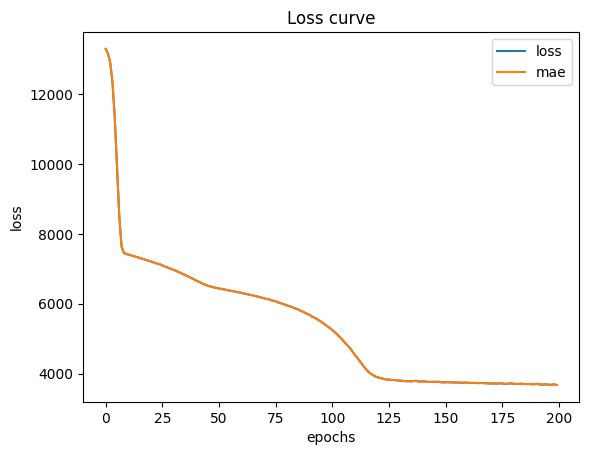

In [ ]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss curve")

### How long should you train for?

* It depends on the problem we are working on. However many people have asked this question earlier,so TensorFlow has a solution! It's called [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a Tf component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing Data(Normalization and Standardization)

* Default scaler with NN is MinMaxScaler(Normalization)
* Standardization reduces the effects of the outliers.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

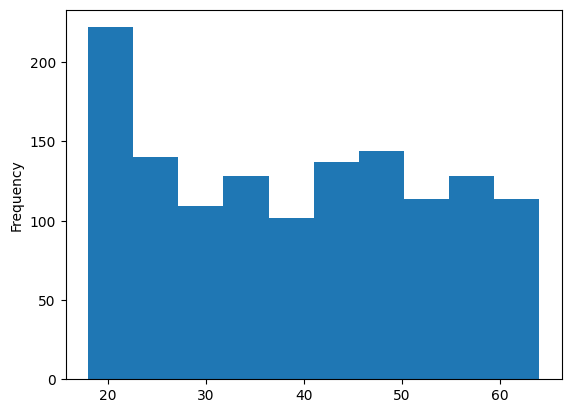

In [ ]:
X["age"].plot(kind='hist')

<Axes: ylabel='Frequency'>

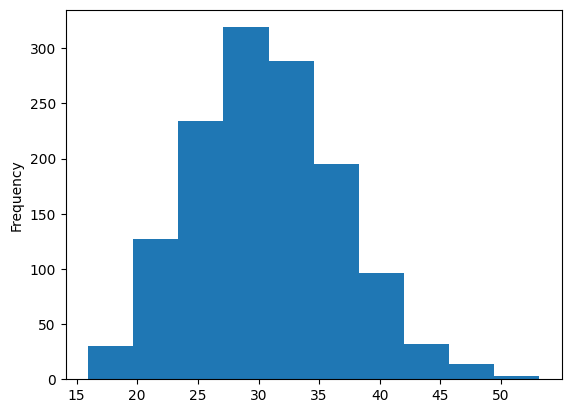

In [ ]:
X["bmi"].plot(kind="hist")

### To prepare our data,we can borrow a few classes from Scikit-Learn


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Fit the column transformer to our training data ONLY
ct.fit(X_train)

#Transform training and test data with Normaliztion(MinMaxScaler) and OneHotEncoding
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

### Our data has been Normalized now and one hot encoded. Now let's build a NN on it and see how it good does it go.

In [ ]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model_4.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.1074 - mae: 13343.1074
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13333.0928 - mae: 13333.0928
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13309.5049 - mae: 13309.5049
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13261.0488 - mae: 13261.0488
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 13176.3936 - mae: 13176.3936
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13044.4678 - mae: 13044.4678
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12854.7402 - mae: 12854.7402
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12597.2148 - mae: 12597.2148
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12261.8877 - mae: 12261.8877
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11846.82

In [ ]:
# Evaluate our insurance model trained on normalized data

insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3433.2312 - mae: 3433.2312


[3433.231201171875, 3433.231201171875]

# Insurance model 2 results VS Insurancee model 4 results

* insurance_model_2.evaluate(X_test,y_test)
 - loss: 4685.2100 - mae: 4685.2100
[4685.2099609375, 4685.2099609375]

* Insurance model 4 has a loss of 3438.5432. Which is almost 50 percent less than that of the 2nd model.

* Hence Normalization helps immensely in reducing the Absolute Error.